In [ ]:
from google.colab import files


uploaded = files.upload()

Saving travel insurance.csv to travel insurance.csv


In [1]:
from google.colab import files


uploaded = files.upload()

Saving TRAVEL.csv to TRAVEL.csv


In [2]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score

import pickle

%matplotlib inline

In [4]:
#import data
df_travel=pd.read_csv("TRAVEL.csv")
df_travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


In [5]:
df_travel.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,KOTAK,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,KOTAK,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,ICICI,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,ICICI,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,ICICI,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [6]:
results = df_travel["Claim"].value_counts(dropna=False)
results

No     62399
Yes      927
Name: Claim, dtype: int64

In [7]:
print("Proportion of claims that are Yes: " , results[1]/(results[0] + results[1]))

Proportion of claims that are Yes:  0.014638537093768752


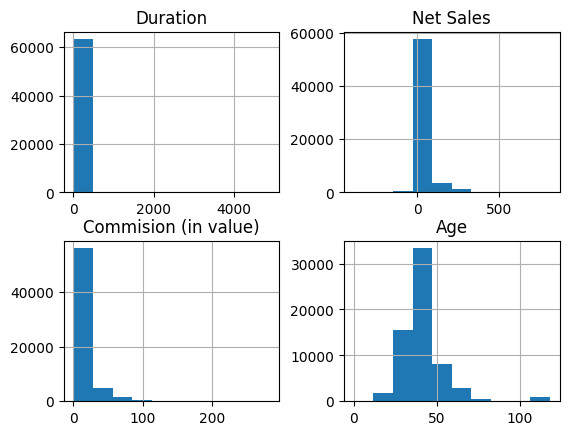

In [8]:
hist=df_travel.hist()

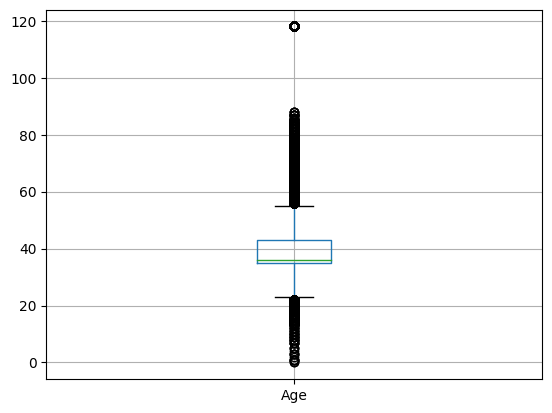

In [9]:
boxplot1 = df_travel.boxplot(column=['Age'])

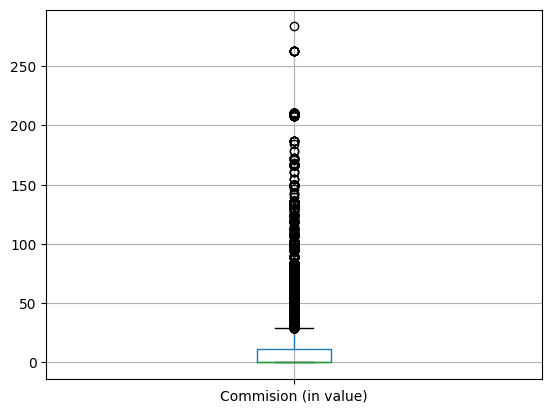

In [10]:
boxplot2 = df_travel.boxplot(column=['Commision (in value)'])

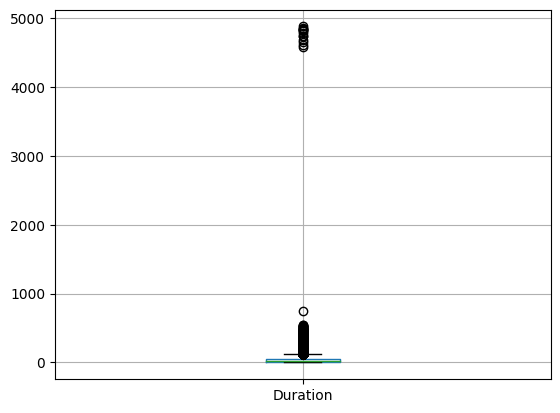

In [11]:
boxplot3 = df_travel.boxplot(column=['Duration'])

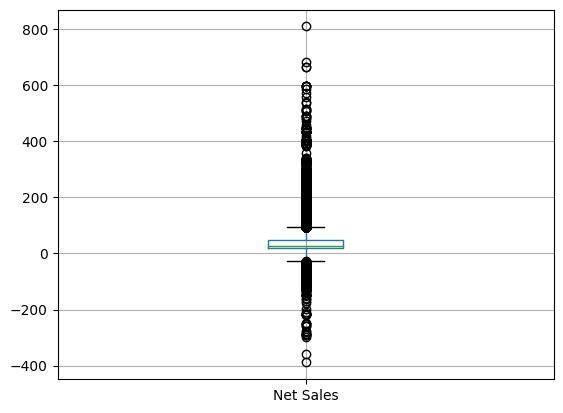

In [12]:
boxplot4 = df_travel.boxplot(column=['Net Sales'])

In [13]:
df_travel.describe()

,Duration,Net Sales,Commision (in value),Age
count,63326.000000,63326.000000,63326.000000,63326.000000
mean,49.317074,40.702018,9.809992,39.969981
std,101.791566,48.845637,19.804388,14.017010
min,-2.000000,-389.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.530000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


In [14]:
df_travel["Agency"].value_counts(dropna=False)

LIC                   35119
ICICI                  8580
MAX LIFE INSURANCE     8267
NEW INDIA              6329
HDFC                   1056
BAJAJ ALLIANZ           749
ORIENTAL                725
HDFC ERGO               689
TATA AIG                528
UNITED INDIA            392
ART                     331
BHARTI AXA              194
KOTAK                   101
SBI                      98
RELIANCE                 86
AEGON                    82
Name: Agency, dtype: int64

In [15]:
df_travel["Agency Type"].value_counts(dropna=False)

Travel Agency    45869
Airlines         17457
Name: Agency Type, dtype: int64

In [16]:
df_travel["Distribution Channel"].value_counts(dropna=False)

Online     62219
Offline     1107
Name: Distribution Channel, dtype: int64

In [17]:
df_travel["Product Name"].value_counts(dropna=False)

Cancellation Plan                       18630
2 way Comprehensive Plan                13158
Rental Vehicle Excess Insurance          8580
Basic Plan                               5469
Bronze Plan                              4049
1 way Comprehensive Plan                 3331
Value Plan                               2715
Silver Plan                              2249
Annual Silver Plan                       1423
Ticket Protector                         1056
Travel Cruise Protect                     527
Comprehensive Plan                        364
Gold Plan                                 352
24 Protect                                247
Single Trip Travel Protect Gold           204
Annual Gold Plan                          194
Premier Plan                              194
Single Trip Travel Protect Silver         173
Annual Travel Protect Gold                100
Annual Travel Protect Silver               86
Individual Comprehensive Plan              74
Single Trip Travel Protect Platinu

In [18]:
df_travel["Destination"].value_counts(dropna=False)

SINGAPORE                 13255
MALAYSIA                   5930
THAILAND                   5894
CHINA                      4796
AUSTRALIA                  3694
                          ...  
SEYCHELLES                    1
SAMOA                         1
NIGERIA                       1
DOMINICAN REPUBLIC            1
BOSNIA AND HERZEGOVINA        1
Name: Destination, Length: 149, dtype: int64

In [19]:
df_travel["Gender"].value_counts(dropna=False)

NaN    45107
M       9347
F       8872
Name: Gender, dtype: int64

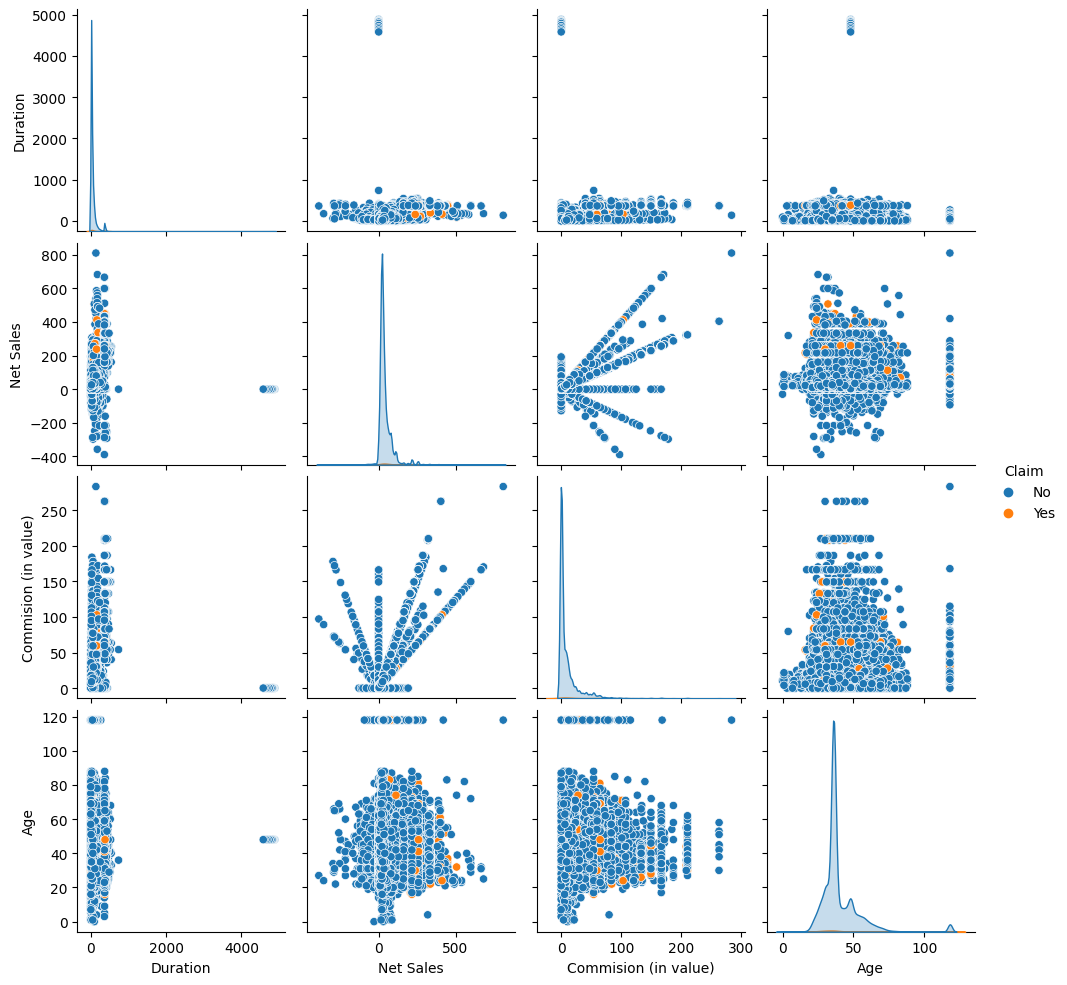

In [20]:
sns.pairplot(df_travel, hue="Claim")

<ipython-input-21-28c25dd09226>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_travel.corr(), annot=True, ax=ax)


<Axes: >

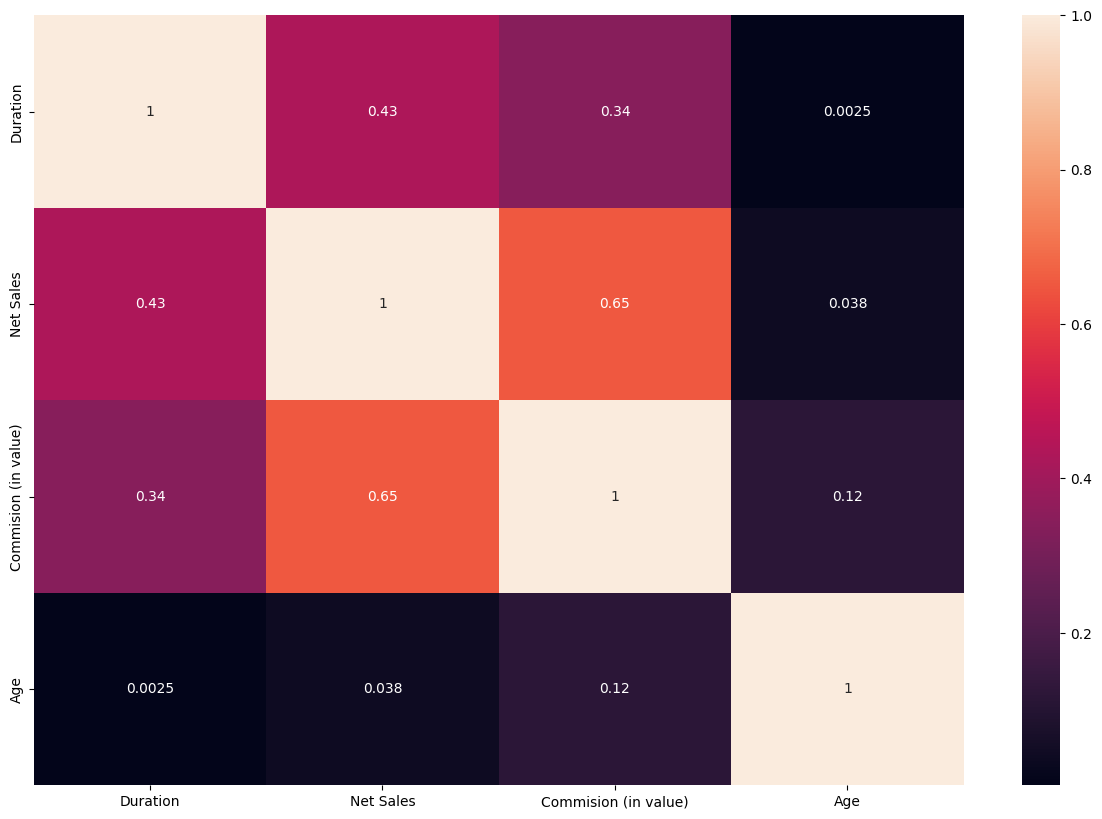

In [21]:
#Correlation Plot
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df_travel.corr(), annot=True, ax=ax)

In [22]:
df_travel1 = df_travel[ df_travel["Age"]<=100]
df_travel2 = df_travel1[ df_travel1["Commision (in value)"]<=250]
df_travel3 = df_travel2[ df_travel2["Duration"]<=1000]

In [23]:
# setup the encoder
le = LabelEncoder()
df_travel4=df_travel3.copy()

# do the encoding for Agency
le.fit(df_travel4['Agency'])
df_travel4['Agency encoded'] = le.transform(df_travel4['Agency'])
df_travel5 = pd.concat([df_travel4, pd.get_dummies(df_travel4['Agency'])], axis=1)

# do the encoding for Agency Type
le.fit(df_travel5['Agency Type'])
df_travel5['Agency Type encoded'] = le.transform(df_travel5['Agency Type'])
df_travel6 = pd.concat([df_travel5, pd.get_dummies(df_travel5['Agency Type'])], axis=1)

# do the encoding for Distribution Channel
le.fit(df_travel6['Distribution Channel'])
df_travel6['Distribution Channel encoded'] = le.transform(df_travel6['Distribution Channel'])
df_travel7 = pd.concat([df_travel6, pd.get_dummies(df_travel6['Distribution Channel'])], axis=1)

# do the encoding for Product Name
le.fit(df_travel7['Product Name'])
df_travel7['Product Name encoded'] = le.transform(df_travel7['Product Name'])
df_travel8 = pd.concat([df_travel7, pd.get_dummies(df_travel7['Product Name'])], axis=1)

# do the encoding for Destination
le.fit(df_travel8['Destination'])
df_travel8['Destination encoded'] = le.transform(df_travel8['Destination'])
df_travel9 = pd.concat([df_travel8, pd.get_dummies(df_travel8['Destination'])], axis=1)

# do the encoding for Gender
#first, address NaN
df_travel9['Gender'].fillna("Other", inplace=True)
le.fit(df_travel9['Gender'])
df_travel9['Gender encoded'] = le.transform(df_travel9['Gender'])
df_travel10 = pd.concat([df_travel9, pd.get_dummies(df_travel9['Gender'])], axis=1)

# encode the Claim variable. 1 for "Yes", 0 for "No"
df_travel10["Claim_Target"] = np.where(df_travel10["Claim"]=='Yes', 1, 0)
df_travel10.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,...,VENEZUELA,VIET NAM,"VIRGIN ISLANDS, U.S.",ZAMBIA,ZIMBABWE,Gender encoded,F,M,Other,Claim_Target
0,KOTAK,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,...,0,0,0,0,0,0,1,0,0,0
1,KOTAK,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,...,0,0,0,0,0,0,1,0,0,0
2,ICICI,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,Other,...,0,0,0,0,0,2,0,0,1,0
3,ICICI,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,Other,...,0,0,0,0,0,2,0,0,1,0
4,ICICI,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,Other,...,0,0,0,0,0,2,0,0,1,0


In [24]:
#check imbalance dataset
df_travel10["Claim_Target"].value_counts(dropna=False)

0    61403
1      917
Name: Claim_Target, dtype: int64

In [25]:
df_col=pd.DataFrame(df_travel10.columns)
df_col.columns=["Column_Name"]

In [26]:
# output to csv because we can't get it to print all of it
df_col.to_csv("travel_ins_col_names.csv")

In [34]:
#split dataset between features and target
features=['Duration', 'Net Sales', 'Commision (in value)', 'Age', 'AEGON', 'ART', 'MAX LIFE INSURANCE', 'KOTAK', 'BHARTI AXA', 'RELIANCE', 'ICICI', 'LIC', 'NEW INDIA', 'UNITED INDIA', 'HDFC ERGO', 'ORIENTAL', 'HDFC', 'TATA AIG', 'SBI', 'Airlines', 'Travel Agency', 'Offline', 'Online', '1 way Comprehensive Plan', '2 way Comprehensive Plan', '24 Protect', 'Annual Gold Plan', 'Annual Silver Plan', 'Annual Travel Protect Gold', 'Annual Travel Protect Platinum', 'Annual Travel Protect Silver', 'Basic Plan', 'Bronze Plan', 'Cancellation Plan', 'Child Comprehensive Plan', 'Comprehensive Plan', 'Gold Plan', 'Individual Comprehensive Plan', 'Premier Plan', 'Rental Vehicle Excess Insurance', 'Silver Plan', 'Single Trip Travel Protect Gold', 'Single Trip Travel Protect Platinum', 'Single Trip Travel Protect Silver', 'Spouse or Parents Comprehensive Plan', 'Ticket Protector', 'Travel Cruise Protect', 'Travel Cruise Protect Family', 'Value Plan', 'ALBANIA', 'ANGOLA', 'ARGENTINA', 'ARMENIA', 'AUSTRALIA', 'AUSTRIA', 'AZERBAIJAN', 'BAHRAIN', 'BANGLADESH', 'BARBADOS', 'BELARUS', 'BELGIUM', 'BENIN', 'BERMUDA', 'BHUTAN', 'BOLIVIA', 'BOSNIA AND HERZEGOVINA', 'BOTSWANA', 'BRAZIL', 'BRUNEI DARUSSALAM', 'BULGARIA', 'CAMBODIA', 'CAMEROON', 'CANADA', 'CAYMAN ISLANDS', 'CHILE', 'CHINA', 'COLOMBIA', 'COSTA RICA', 'CROATIA', 'CYPRUS', 'CZECH REPUBLIC', 'DENMARK', 'DOMINICAN REPUBLIC', 'ECUADOR', 'EGYPT', 'ESTONIA', 'ETHIOPIA', 'FAROE ISLANDS', 'FIJI', 'FINLAND', 'FRANCE', 'FRENCH POLYNESIA', 'GEORGIA', 'GERMANY', 'GHANA', 'GREECE', 'GUADELOUPE', 'GUAM', 'GUATEMALA', 'GUINEA', 'GUINEA-BISSAU', 'GUYANA', 'HONG KONG', 'HUNGARY', 'ICELAND', 'INDIA', 'INDONESIA', 'IRAN, ISLAMIC REPUBLIC OF', 'IRELAND', 'ISRAEL', 'ITALY', 'JAMAICA', 'JAPAN', 'JORDAN', 'KAZAKHSTAN', 'KENYA', 'KOREA, REPUBLIC OF', 'KUWAIT', 'KYRGYZSTAN', "LAO PEOPLE'S DEMOCRATIC REPUBLIC", 'LATVIA', 'LEBANON', 'LIBYAN AORIENTAL JAMAHIRIYA', 'LITHUANIA', 'LUXEMBOURG', 'MACAO', 'MACEDONIA, THE FORMER YUGOSLAV REPUBLIC OF', 'MALAYSIA', 'MALDIVES', 'MALI', 'MALTA', 'MAURITIUS', 'MEXICO', 'MOLDOVA, REPUBLIC OF', 'MONGOLIA', 'MOROCCO', 'MYANMAR', 'NAMIBIA', 'NEPAL', 'NETHERLANDS', 'NEW CALEDONIA', 'NEW ZEALAND', 'NIGERIA', 'NORTHERN MARIANA ISLANDS', 'NORWAY', 'OMAN', 'PAKISTAN', 'PANAMA', 'PAPUA NEW GUINEA', 'PERU', 'PHILIPPINES', 'POLAND', 'PORTUGAL', 'PUERTO RICO', 'QATAR', 'REPUBLIC OF MONTENEGRO', 'REUNION', 'ROMANIA', 'RUHDFCAN FEDERATION', 'RWANDA', 'SAMOA', 'SAUDI AORIENTALIA', 'SENEGAL', 'SERBIA', 'SEYCHELLES', 'SIERRA LEONE', 'SINGAPORE', 'SLOVENIA', 'SOLOMON ISLANDS', 'SOUTH AFRICA', 'SPAIN', 'SRI LANKA', 'SWEDEN', 'SWITZERLAND', 'TAIWAN, PROVINCE OF CHINA', 'TAJIKISTAN', 'TANZANIA, UNITED REPUBLIC OF', 'THAILAND', 'TRINIDAD AND TOBAGO', 'TUNISIA', 'TURKEY', 'TURKMENISTAN', 'TURKS AND CAICOS ISLANDS', 'UGANDA', 'UKRAINE', 'UNITED AORIENTAL EMIRATES', 'UNITED KINGDOM', 'UNITED STATES', 'URUGUAY', 'UZBEKISTAN', 'VANUATU', 'VENEZUELA', 'VIET NAM', 'VIRGIN ISLANDS, U.S.', 'ZAMBIA', 'ZIMBABWE', 'F', 'M', 'Other']
target = "Claim_Target"

X = df_travel10.loc[:, features]
y = df_travel10[target]
X.head()

,Duration,Net Sales,Commision (in value),Age,AEGON,ART,MAX LIFE INSURANCE,KOTAK,BHARTI AXA,RELIANCE,...,UZBEKISTAN,VANUATU,VENEZUELA,VIET NAM,"VIRGIN ISLANDS, U.S.",ZAMBIA,ZIMBABWE,F,M,Other
0,186,-29.0,9.57,81,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,186,-29.0,9.57,71,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,65,-49.5,29.70,32,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,60,-39.6,23.76,32,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,79,-19.8,11.88,41,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [35]:
#split between training and test set, default 4:1
X_train1, X_test1, y_train, y_test = train_test_split(X, y)
X_train1.shape, X_test1.shape, y_train.shape, y_test.shape

((46740, 199), (15580, 199), (46740,), (15580,))

In [36]:
# Do scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train1)
X_test=scaler.transform(X_test1)

(46740, 2)
(46740,)
<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>


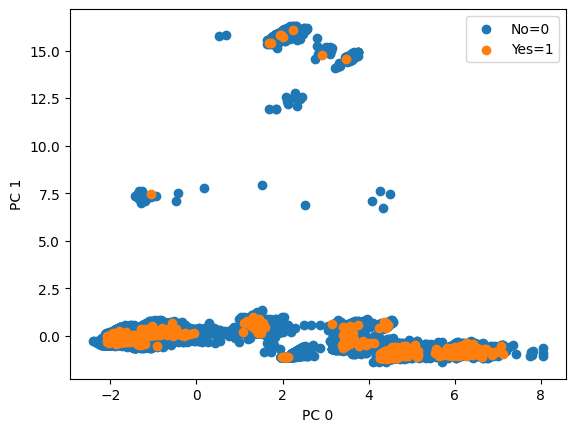

In [37]:
# Do PCA before and after SMOTE to see effects
pca_2d_before = PCA(n_components=2)
pca_2d_before.fit(X_train)
Z_train_pca_2d_before = pca_2d_before.transform(X_train)

print(Z_train_pca_2d_before.shape)
print(y_train.shape)
print(type(Z_train_pca_2d_before), type(y_train))

mask0 = (y_train == 0)
mask1 = (y_train == 1)

fig, ax = plt.subplots()

# ax.scatter(Z[:, 0], Z[:, 1]) # Z[:, 0] - first col, Z[:, 1], 2nd col

# numpy slicing arr[row, col]
ax.scatter(Z_train_pca_2d_before[mask0, 0], Z_train_pca_2d_before[mask0, 1], label='No=0')
ax.scatter(Z_train_pca_2d_before[mask1, 0], Z_train_pca_2d_before[mask1, 1], label='Yes=1')

ax.set_xlabel('PC 0')
ax.set_ylabel('PC 1')
ax.legend()
plt.show()

In [38]:
# Import necessary libraries
import numpy as np
from imblearn.over_sampling import SMOTE

# Assuming you have X_train and y_train defined earlier in your code
# X_train should be your feature matrix, and y_train should be your target labels

# Initialize SMOTE
sm = SMOTE(random_state=2)

# Resample the data
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# Check the shape and types of the resampled data
print(X_train_resampled.shape, y_train_resampled.shape)
print(type(X_train_resampled), type(y_train_resampled))


(92108, 199) (92108,)
<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>


In [39]:
y_train.sum()

686

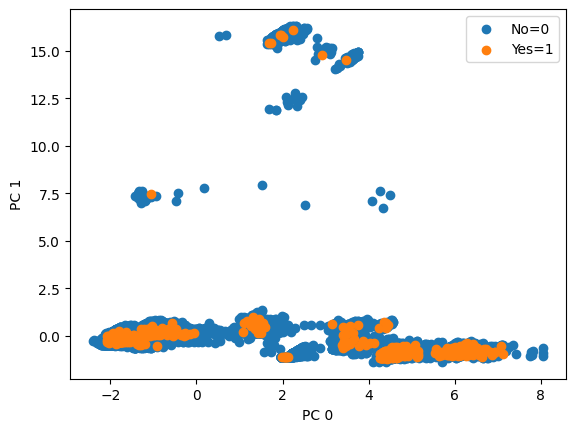

In [40]:
# pca
pca_2d = PCA(n_components=2)
pca_2d.fit(X_train)
Z_train_pca_2d = pca_2d.transform(X_train)

mask0 = (y_train == 0)
mask1 = (y_train == 1)

fig, ax = plt.subplots()

# numpy slicing arr[row, col]
ax.scatter(Z_train_pca_2d[mask0, 0], Z_train_pca_2d[mask0, 1], label='No=0')
ax.scatter(Z_train_pca_2d[mask1, 0], Z_train_pca_2d[mask1, 1], label='Yes=1')

ax.set_xlabel('PC 0')
ax.set_ylabel('PC 1')
ax.legend()
plt.show()

In [41]:
num_input_features = len(features)
num_input_features

199

In [42]:
#code to clear old keras model
import keras
keras.backend.clear_session()

In [43]:
from keras.models import Sequential
from keras.layers import Dense
# from keras.layers import Dropout

model = Sequential()

#start with 400 nodes
model.add(Dense(400, activation='relu', input_shape=(num_input_features,)))

#input num_input_features, 199.
#output 199 as well.
model.add(Dense(200, activation='relu'))
# model.add(Dropout(0.2))

#input 199. output 50
model.add(Dense(50, activation='relu'))
# model.add(Dropout(0.2))

# softmax converts a set of outputs to probabilities that add up to 1
num_classes=1 #didn't work with 1, so try two
model.add(Dense(num_classes, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               80000     
                                                                 
 dense_1 (Dense)             (None, 200)               80200     
                                                                 
 dense_2 (Dense)             (None, 50)                10050     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 170301 (665.24 KB)
Trainable params: 170301 (665.24 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [44]:
from keras.callbacks import TensorBoard
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.optimizers import RMSprop
from keras.utils import to_categorical
import time

batch_size = 10
epochs = 20

#y_train_binary = to_categorical(y_train)
#y_test_binary = to_categorical(y_test)

tensorboard = TensorBoard(log_dir='./logs/insurance_mlp/%d' % time.time())
earlystop = EarlyStopping(monitor='val_loss', patience=1, mode='auto')
checkpoint = ModelCheckpoint('travel_insurance_model.h5')

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy']) # Tensorboard will display
                                    # acc in addition to loss

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    callbacks=[tensorboard, earlystop, checkpoint],
                    validation_data=(X_test, y_test))

Epoch 1/20
4674/4674 [==============================] - 14s 3ms/step - loss: 0.0813 - accuracy: 0.9852 - val_loss: 0.0821 - val_accuracy: 0.9850
Epoch 2/20
  80/4674 [..............................] - ETA: 8s - loss: 0.0796 - accuracy: 0.9850

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4674/4674 [==============================] - 13s 3ms/step - loss: 0.0790 - accuracy: 0.9853 - val_loss: 0.0878 - val_accuracy: 0.9846


In [45]:
y_pred_prob = model.predict(X_test)
y_pred = y_pred_prob.argmax(axis=1)


487/487 [==============================] - 1s 1ms/step


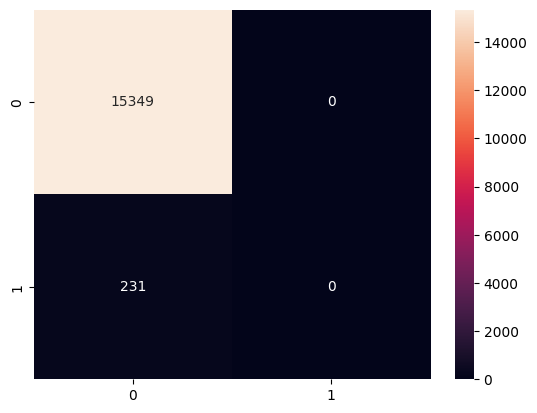

In [46]:
# Computing metrics
from sklearn.metrics import confusion_matrix, classification_report
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()

In [47]:
print(classification_report(y_test, y_pred,zero_division=1))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15349
           1       1.00      0.00      0.00       231

    accuracy                           0.99     15580
   macro avg       0.99      0.50      0.50     15580
weighted avg       0.99      0.99      0.98     15580



In [48]:

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.985173299101412


In [49]:
import pickle

In [50]:
pickle.dump(model, open('Sid.pkl','wb'))